In [152]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

pd.set_option("display.max_rows", 20)
STEM = pd.read_csv(r"C:\Users\00gun\Desktop\Fall 2021\COMP 3625\A2\Levels_Fyi_Salary_Data.csv")
STOCKS = pd.read_csv(r"C:\Users\00gun\Desktop\Fall 2021\COMP 3625\A2\Stocks.csv")
print(STOCKS.shape)
print(STEM.shape)
print("The STEM salaries dataset has {} rows and {} columns.".format(STEM.shape[0], STEM.shape[1]))
print("The STOCKS dataset has {} rows and {} columns.".format(STOCKS.shape[0],STOCKS.shape[1]))

(5, 2)
(62642, 29)
The STEM salaries dataset has 62642 rows and 29 columns.
The STOCKS dataset has 5 rows and 2 columns.


In [153]:
STEM.head

<bound method NDFrame.head of              timestamp     company     level                         title  \
0       6/7/2017 11:33      Oracle        L3               Product Manager   
1      6/10/2017 17:11        eBay      SE 2             Software Engineer   
2      6/11/2017 14:53      Amazon        L7               Product Manager   
3       6/17/2017 0:23       Apple        M1  Software Engineering Manager   
4      6/20/2017 10:58   Microsoft        60             Software Engineer   
...                ...         ...       ...                           ...   
62637   9/9/2018 11:52      Google        T4             Software Engineer   
62638   9/13/2018 8:23   Microsoft        62             Software Engineer   
62639  9/13/2018 14:35        MSFT        63             Software Engineer   
62640  9/16/2018 16:10  Salesforce  Lead MTS             Software Engineer   
62641   1/29/2019 5:12       apple      ict3             Software Engineer   

       totalyearlycompensation   

In [154]:
for col in STEM.columns:
    print(col)

timestamp
company
level
title
totalyearlycompensation
location
yearsofexperience
yearsatcompany
tag
basesalary
stockgrantvalue
bonus
gender
otherdetails
cityid
dmaid
rowNumber
Masters_Degree
Bachelors_Degree
Doctorate_Degree
Highschool
Some_College
Race_Asian
Race_White
Race_Two_Or_More
Race_Black
Race_Hispanic
Race
Education


In [155]:
print(STEM.dtypes)

timestamp                  object
company                    object
level                      object
title                      object
totalyearlycompensation     int64
                            ...  
Race_Two_Or_More            int64
Race_Black                  int64
Race_Hispanic               int64
Race                       object
Education                  object
Length: 29, dtype: object


In [156]:
print(type(STEM))
print(type(STEM.company))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [157]:
STEM.company

0            Oracle
1              eBay
2            Amazon
3             Apple
4         Microsoft
            ...    
62637        Google
62638     Microsoft
62639          MSFT
62640    Salesforce
62641         apple
Name: company, Length: 62642, dtype: object

In [158]:
print(type(STEM.gender.value_counts()))
STEM.gender.value_counts()

<class 'pandas.core.series.Series'>


Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

In [159]:
STEM['Total_salary'] = STEM['basesalary'] + STEM['bonus']
income_labels =['Very low', 'Low', 'Mid', 'Upper Mid', 'High', 'Very High']
STEM['Salary_group'] = pd.qcut( STEM['Total_salary'], q = [0, 0.10, 0.20, 0.60, 0.90, 0.95, 1], labels = income_labels)
STEM.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Total_salary,Salary_group
0,6/7/2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,NaN,NaN,117000.0,Mid
1,6/10/2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,NaN,NaN,0.0,Very low
2,6/11/2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,NaN,NaN,155000.0,Mid
3,6/17/2017 0:23,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,NaN,NaN,192000.0,Upper Mid
4,6/20/2017 10:58,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,NaN,NaN,0.0,Very low


In [160]:
STEM.Salary_group.value_counts()

Mid          24765
Upper Mid    19122
Low           6522
Very low      6309
Very High     3015
High          2909
Name: Salary_group, dtype: int64

<AxesSubplot:>

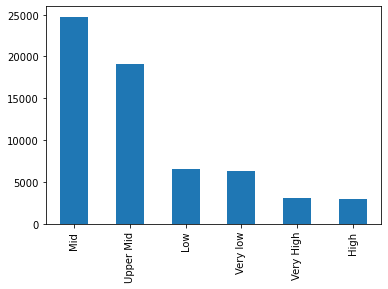

In [161]:
STEM.Salary_group.value_counts().plot ( kind = "bar")

<AxesSubplot:xlabel='company', ylabel='Stock_avg'>

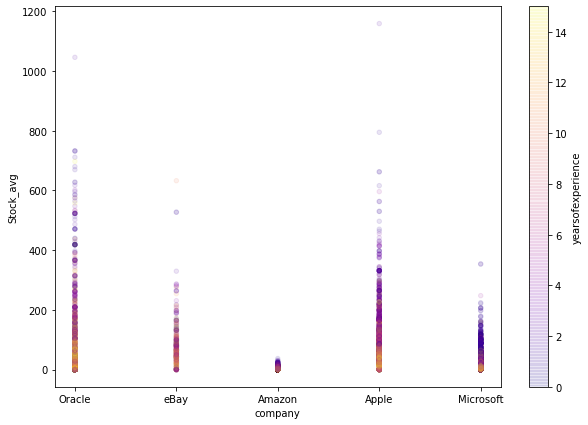

In [216]:
combine = pd.merge(STEM, STOCKS[['company', 'Stock Price (As of Nov 16 2021)']], on='company')
combine["Stock_amount"] = combine["stockgrantvalue"] / combine["Stock Price (As of Nov 16 2021)"]
combine["Stock_avg"] = combine["Stock_amount"] / combine["yearsofexperience"]

fig, ax = plt.subplots()
combine.plot( kind = "scatter", x = "company", y = "Stock_avg", alpha = 0.1,
            figsize = (10,7), c = "yearsofexperience", vmin = 0, vmax = 15,
             cmap = plt.get_cmap("plasma"),  ax=ax)


In [ ]:
#combine.plot( kind = "bar", x = "gender", y = "Total_salary")

In [215]:
#combine.gender.value_counts()

In [ ]:
pd.crosstab(iris.Species,iris.SepalLengthCm)

In [ ]:
pd.qcut(iris['SepalLengthCm'], q=3) #splits into 3 parts

In [ ]:
iris['3_bin'] = pd.qcut(iris['SepalLengthCm'], q=3)
iris['5_bin'] = pd.qcut(iris['SepalLengthCm'], q=5)
iris.head()

In [ ]:
iris.tail()

In [ ]:
iris['5_bin'].value_counts()

In [ ]:
cat_bins = ['Small', 'Medium', 'Large']
iris['sepal_bins'] = pd.qcut(iris['SepalLengthCm'], q=[0,0.4,0.8,1], labels=cat_bins)
iris.head()

In [ ]:
iris.sepal_bins.value_counts()

In [ ]:
iris.sepal_bins.value_counts().plot(kind="bar")

In [ ]:
pd.crosstab(iris.Species,iris.sepal_bins)

In [ ]:
# Feature selection
#split dataset in features and target variable
#SepalLengthCm
#SepalWidthCm
#PetalLengthCm
#PetalWidthCm
#Species
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris[feature_cols] # Features
y = iris.Species # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
print(type(X_train))

In [ ]:
print("X_train = ", X_train.shape, "X_test= ", X_test.shape, "y_train = ", y_train.shape, "y_test = ", y_test.shape)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [ ]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# 1, 4,4,4,4 
# SepalLengthCm
# SepalWidthCm
# PetalLengthCm
# PetalWidthCm
t = {'SepalLengthCm':[1], 'SepalWidthCm':[1], 'PetalLengthCm':[4], 'PetalWidthCm':[4]}
trythis = pd.DataFrame(data=t)
trythis


In [ ]:
trypred = clf.predict(trythis)
trypred

In [ ]:
# how good is it? 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$

In [ ]:
sp=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
confusion_matrix(y_test,y_pred, labels=sp)

In [ ]:
dazed = pd.DataFrame(
    confusion_matrix(y_test, y_pred, labels=sp), 
    index=['true:setosa', 'true:versicolor', 'true:virginica'], 
    columns=['pred:setosa', 'pred:versicolo', 'pred:virginica']
)
print(dazed)

In [ ]:
New = pd.DataFrame({'SepalLengthCm': [7,4.8, 3.2], 
                   'SepalWidthCm': [7, 4.0, 3.5], 
                   'PetalLengthCm': [7,1.4,1.6], 
                   'PetalWidthCm': [7,0.5,0.5]})
New

In [ ]:
trypred = clf.predict(New)
trypred